In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.14.0


In [30]:
concrete_data = pd.read_excel("/Users/sahityaraipura/Desktop/Concrete_Data.xls")
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [31]:
concrete_data.rename({'Cement (component 1)(kg in a m^3 mixture)': 'Cement', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Slag', 'Fly Ash (component 3)(kg in a m^3 mixture)': 'FlyAsh', 'Water  (component 4)(kg in a m^3 mixture)': 'Water', 'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse', 'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine', 'Age (day)': 'Age', 'Concrete compressive strength(MPa, megapascals) ': 'Concrete'}, axis=1, inplace=True)

concrete_data.head()

,Cement,Slag,FlyAsh,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [32]:
concrete_data.shape

(1030, 9)

In [33]:
list(concrete_data.columns.values)

['Cement',
 'Slag',
 'FlyAsh',
 'Water',
 'Superplasticizer',
 'Coarse',
 'Fine',
 'Age',
 'Concrete']

In [34]:
concrete_data.describe()

,Cement,Slag,FlyAsh,Water,Superplasticizer,Coarse,Fine,Age,Concrete
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [35]:
#mean_fly_ash = concrete_data['Fly Ash (component 3)(kg in a m^3 mixture)'].dropna().mean()
#concrete_data = concrete_data.replace({'Fly Ash (component 3)(kg in a m^3 mixture)': {0:mean_fly_ash}})


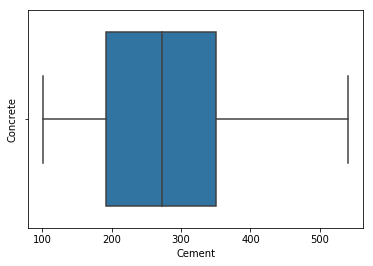

In [36]:
sns.scatterplot(x=concrete_data['Cement'], y=concrete_data['Concrete'])
sns.boxplot(x=concrete_data['Cement'])

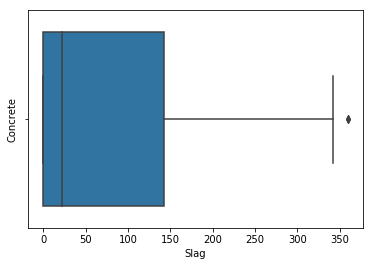

In [37]:
sns.scatterplot(x=concrete_data['Slag'], y=concrete_data['Concrete'])
sns.boxplot(x=concrete_data['Slag'])

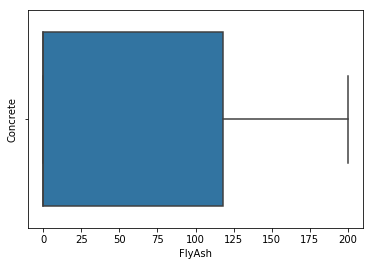

In [38]:
sns.scatterplot(x=concrete_data['FlyAsh'], y=concrete_data['Concrete'])
sns.boxplot(x=concrete_data['FlyAsh'])

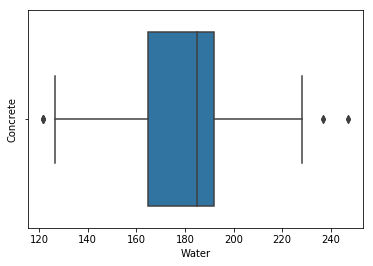

In [39]:
sns.scatterplot(x=concrete_data['Water'], y=concrete_data['Concrete'])
sns.boxplot(x=concrete_data['Water'])

181.56635922330082


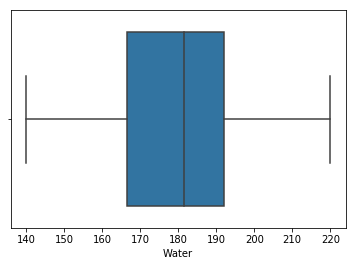

In [40]:
mean_Water = concrete_data['Water'].mean(skipna=True)
print(mean_Water)

concrete_data['Water'] = concrete_data.Water.mask(concrete_data.Water > 220, mean_Water)
concrete_data['Water'] = concrete_data.Water.mask(concrete_data.Water < 140, mean_Water)

sns.boxplot(x=concrete_data['Water'])

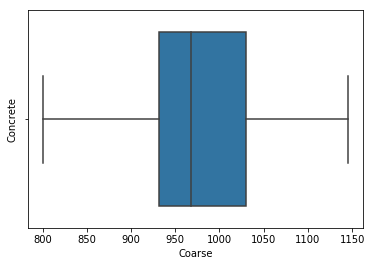

In [41]:
sns.scatterplot(x=concrete_data['Coarse'], y=concrete_data['Concrete'])
sns.boxplot(x=concrete_data['Coarse'])

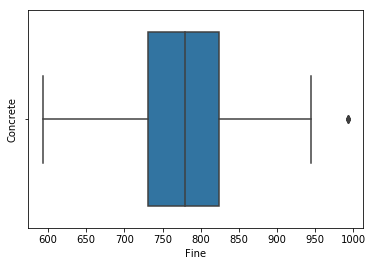

In [42]:
sns.scatterplot(x=concrete_data['Fine'], y=concrete_data['Concrete'])
sns.boxplot(x=concrete_data['Fine'])

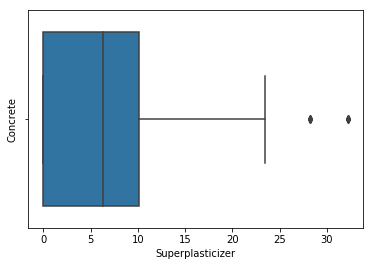

In [43]:
sns.scatterplot(x=concrete_data['Superplasticizer'], y=concrete_data['Concrete'])
sns.boxplot(x=concrete_data['Superplasticizer'])

In [44]:
#mean_Superplasticizer = concrete_data['Superplasticizer'].mean(skipna=True)
#print(mean_Superplasticizer)

#concrete_data['Superplasticizer'] = concrete_data.Superplasticizer.mask(concrete_data.Superplasticizer > 25, mean_Superplasticizer)

#sns.boxplot(x=concrete_data['Superplasticizer'])

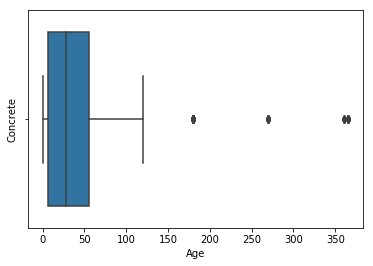

In [45]:
sns.scatterplot(x=concrete_data['Age'], y=concrete_data['Concrete'])
sns.boxplot(x=concrete_data['Age'])
                

45.662135922330094


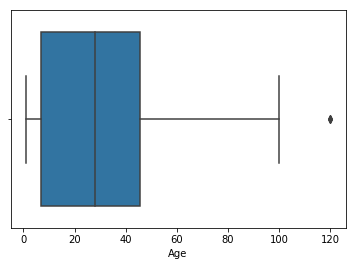

In [46]:
mean_Age = concrete_data['Age'].mean(skipna=True)
print(mean_Age)

concrete_data['Age'] = concrete_data.Age.mask(concrete_data.Age > 150, mean_Age)

sns.boxplot(x=concrete_data['Age'])

In [47]:
#mean_superplasticizer  = concrete_data['Superplasticizer (component 5)(kg in a m^3 mixture)'].dropna().mean()
#concrete_data = concrete_data.replace({'Superplasticizer (component 5)(kg in a m^3 mixture)': {0:mean_superplasticizer}})

#concrete_data = concrete_data.drop('Superplasticizer', axis = 1)
#concrete_data = concrete_data.drop('Fly Ash (component 3)(kg in a m^3 mixture)', axis = 1)



In [48]:
#mean_blast_furnace  = concrete_data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].dropna().mean()
#concrete_data = concrete_data.replace({'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': {0:mean_blast_furnace}})

In [49]:
from sklearn.model_selection import train_test_split
train_dataset = concrete_data.sample(frac=0.8,random_state=0)
test_dataset = concrete_data.drop(train_dataset.index)

In [50]:
train_dataset.shape

(824, 9)

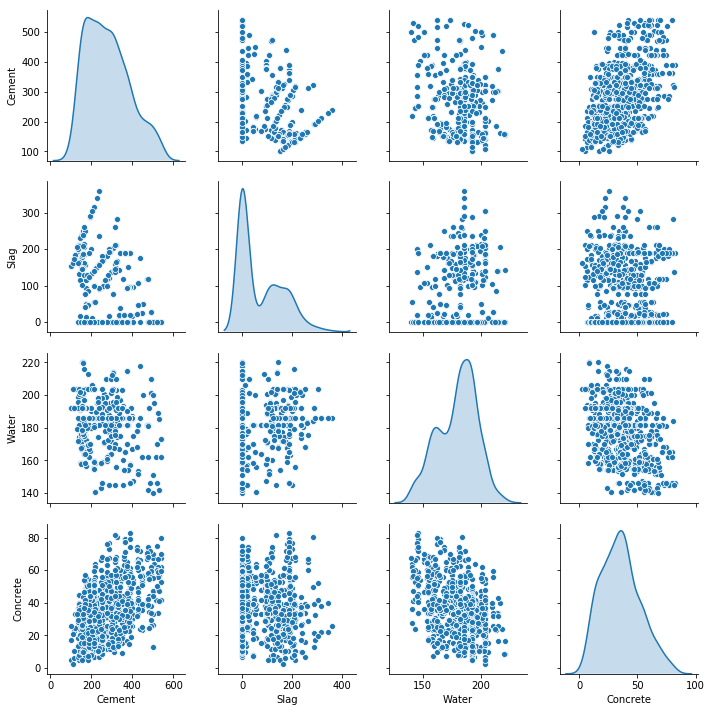

In [51]:
sns.pairplot(train_dataset[["Cement", "Slag", "Water", "Concrete"]], diag_kind="kde")

In [52]:
train_stats = train_dataset.describe()
train_stats.pop("Concrete")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cement,824.0,280.270971,104.483845,102.0,193.125,266.000000,350.000000,540.0
Slag,824.0,73.170910,85.865408,0.0,0.000,22.000000,142.500000,359.4
FlyAsh,824.0,55.317124,64.097588,0.0,0.000,0.000000,118.270000,200.1
Water,824.0,179.819301,16.593986,140.0,166.925,181.566359,192.000000,220.0
Superplasticizer,824.0,6.146244,6.000398,0.0,0.000,6.100000,10.115000,32.2
Coarse,824.0,973.990789,77.755716,801.0,932.000,968.000000,1030.250000,1145.0
Fine,824.0,771.896408,80.030794,594.0,721.750,779.320000,824.000000,992.6
Age,824.0,33.553561,28.137810,1.0,7.000,28.000000,45.662136,120.0


In [53]:
train_labels = train_dataset.pop('Concrete')
test_labels = test_dataset.pop('Concrete')

In [54]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [55]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [56]:
model = build_model()

W0706 11:15:56.658390 140735904367552 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [58]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.29134893],
       [-0.12312934],
       [-0.15759149],
       [-0.29677624],
       [-0.09258661],
       [-0.4620595 ],
       [-0.20617463],
       [-0.07614319],
       [ 0.05179623],
       [ 0.19068515]], dtype=float32)

In [59]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [60]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,5.947401,1.808483,5.947402,35.868563,4.087393,35.868565,995
996,5.627338,1.743575,5.627337,34.291276,3.940476,34.291275,996
997,5.831546,1.748532,5.831547,38.004536,4.223579,38.004536,997
998,5.353214,1.646184,5.353214,34.546572,3.984982,34.546570,998
999,5.964913,1.757490,5.964913,34.818188,3.995045,34.818188,999


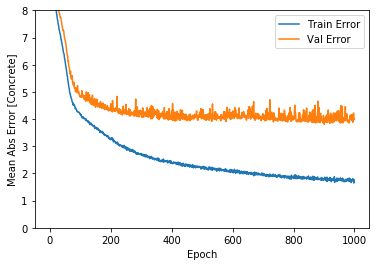

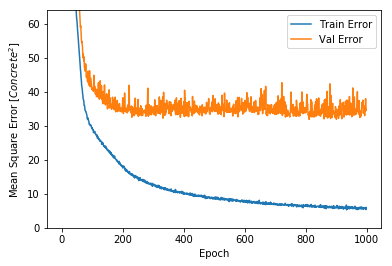

In [62]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Concrete]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,8])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Concrete^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,64])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
................................................

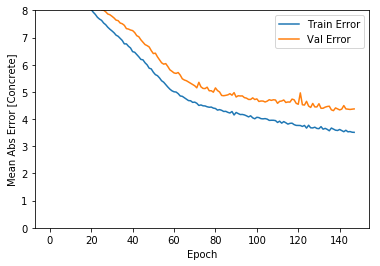

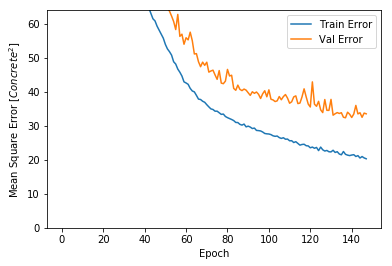

In [63]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [64]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Concrete".format(mae))

Testing set Mean Abs Error:  4.13 Concrete


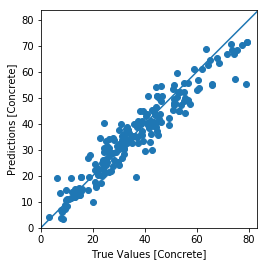

In [67]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Concrete]')
plt.ylabel('Predictions [Concrete]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

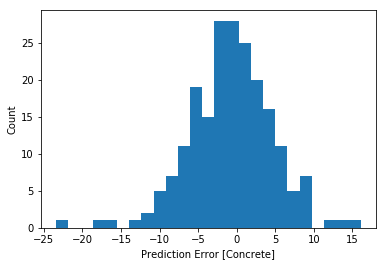

In [66]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Concrete]")
_ = plt.ylabel("Count")